In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NEW_API_kaggle.json to NEW_API_kaggle.json


In [ ]:
#create kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy json file to folder
! cp NEW_API_kaggle.json ~/.kaggle/

In [ ]:
!mv /content/NEW_API_kaggle.json /root/.kaggle/kaggle.json

In [ ]:
#permission for JSON to act
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          14779        309  1.0              
kapturovalexander/time-series-for-online-store                   🏪🏬🪫 Electronic store sales data                      9MB  2024-04-30 09:33:41            942         28  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                      2MB  2024-04-29 19:29:56           2579         51  1.0              
muhammadibrahimqasmi/nvidia-corporation-nvda-stock-2020-to-2

In [ ]:
!kaggle datasets download -d landrykezebou/uot32-underwater-object-tracking-dataset

Dataset URL: https://www.kaggle.com/datasets/landrykezebou/uot32-underwater-object-tracking-dataset
License(s): other
100% 3.39G/3.40G [00:37<00:00, 132MB/s]
100% 3.40G/3.40G [00:37<00:00, 98.1MB/s]


In [ ]:
!unzip uot32-underwater-object-tracking-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: SeaTurtle1/img/632.jpg  
  inflating: SeaTurtle1/img/633.jpg  
  inflating: SeaTurtle1/img/634.jpg  
  inflating: SeaTurtle1/img/635.jpg  
  inflating: SeaTurtle1/img/636.jpg  
  inflating: SeaTurtle1/img/637.jpg  
  inflating: SeaTurtle1/img/638.jpg  
  inflating: SeaTurtle1/img/639.jpg  
  inflating: SeaTurtle1/img/64.jpg   
  inflating: SeaTurtle1/img/640.jpg  
  inflating: SeaTurtle1/img/641.jpg  
  inflating: SeaTurtle1/img/642.jpg  
  inflating: SeaTurtle1/img/643.jpg  
  inflating: SeaTurtle1/img/644.jpg  
  inflating: SeaTurtle1/img/645.jpg  
  inflating: SeaTurtle1/img/646.jpg  
  inflating: SeaTurtle1/img/647.jpg  
  inflating: SeaTurtle1/img/648.jpg  
  inflating: SeaTurtle1/img/649.jpg  
  inflating: SeaTurtle1/img/65.jpg   
  inflating: SeaTurtle1/img/650.jpg  
  inflating: SeaTurtle1/img/651.jpg  
  inflating: SeaTurtle1/img/652.jpg  
  inflating: SeaTurtle1/img/653.jpg  
  inflating: SeaTurtle1/img/654.jpg  

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

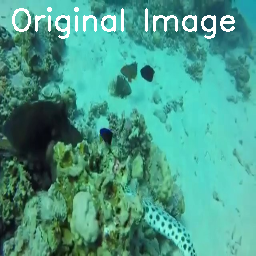

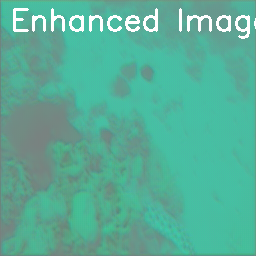

SSIM: 0.4649639827553829
PSNR: 15.132122356121842
MSE: 109.12919616699219


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Define U-Net model
def build_unet(input_shape):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Expansive Path
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output layer
    outputs = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load the image dataset
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256)) / 255.0  # Normalize pixel values
    return img

# Train the U-Net model
def train_model(model, original_image, epochs):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(np.expand_dims(original_image, axis=0), np.expand_dims(original_image, axis=0), epochs=epochs, batch_size=1)
    return history


# Display original and enhanced images with labels
def display_results(original_image, enhanced_image):
    original_image = cv2.convertScaleAbs(original_image, alpha=255.0)
    enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=255.0)

    cv2.putText(original_image, "Original Image", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(enhanced_image, "Enhanced Image", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2_imshow(cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))
    cv2_imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

# Compute metrics for the image
def compute_metrics(original_image, enhanced_image):
    original_image_gray = cv2.cvtColor(np.uint8(original_image * 255), cv2.COLOR_RGB2GRAY)
    enhanced_image_gray = cv2.cvtColor(np.uint8(enhanced_image * 255), cv2.COLOR_RGB2GRAY)

    ssim_score = ssim(original_image_gray, enhanced_image_gray)
    psnr_score = psnr(original_image_gray, enhanced_image_gray)
    mse_score = np.mean((original_image_gray - enhanced_image_gray) ** 2)

    return ssim_score, psnr_score, mse_score


# Load the image
image_path = "/content/Octopus1/img/1.jpg"
original_image = load_image(image_path)

# Build and summarize the U-Net model
model = build_unet((256, 256, 3))
model.summary()

# Train the model
epochs = 10
history = train_model(model, original_image, epochs)

# Display results
enhanced_image = model.predict(np.expand_dims(original_image, axis=0))[0]
display_results(original_image, enhanced_image)
# Compute metrics
ssim_score, psnr_score, mse_score = compute_metrics(original_image, enhanced_image)
print("SSIM:", ssim_score)
print("PSNR:", psnr_score)
print("MSE:", mse_score)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from google.colab.patches import cv2_imshow

# Define U-Net model
def build_unet(input_shape):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Expansive Path
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output layer
    outputs = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load the image dataset
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256)) / 255.0  # Normalize pixel values
    return img

# Train the U-Net model with data augmentation
def train_model_with_augmentation(model, original_image, epochs):
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

    # Compile the model
    model.compile(optimizer=Adam(), loss=MeanSquaredError())

    # Fit the model on the augmented data
    history = model.fit(datagen.flow(np.expand_dims(original_image, axis=0), np.expand_dims(original_image, axis=0), batch_size=1),
                        steps_per_epoch=100, epochs=epochs, verbose=1)  # Adjust steps_per_epoch value

    return history



# Display original and enhanced images with labels
def display_results(original_image, enhanced_image):
    original_image = cv2.convertScaleAbs(original_image, alpha=255.0)
    enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=255.0)

    cv2.putText(original_image, "Original Image", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(enhanced_image, "Enhanced Image", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2_imshow(np.hstack([original_image, enhanced_image]))

import os

# Function to load images from a directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (256, 256)) / 255.0  # Normalize pixel values
            images.append(img)
    return images

# Define the directory containing images
image_directory = "/content/Octopus1/img"

# Load images from the directory
image_dataset = load_images_from_directory(image_directory)

# Example: Print the number of images loaded
print("Number of images loaded:", len(image_dataset))
# Define the dataset and apply repeat function
# Assuming you have a TensorFlow dataset object named 'dataset' defined previously
import tensorflow as tf

# Convert image_dataset list to a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices(image_dataset)

# Apply repeat function to repeat the dataset for multiple epochs
dataset = dataset.repeat()

# Now you can use the dataset for training


# Assuming you have defined your batch size
batch_size = 32  # You can adjust this according to your needs

# Calculate steps per epoch
steps_per_epoch = len(dataset) // batch_size

# Train the model with the calculated steps_per_epoch
history = model.fit(dataset, epochs=epochs, steps_per_epoch=steps_per_epoch)





# Build the U-Net model
model = build_unet((256, 256, 3))
model.summary()

# Train the model
epochs = 10  # Increase the number of epochs if needed
history = train_model_with_augmentation(model, original_image, epochs)

# Generate enhanced image
enhanced_image = model.predict(np.expand_dims(original_image, axis=0))[0]

# Display original and enhanced images
display_results(original_image, enhanced_image)


Number of images loaded: 1662


TypeError: The dataset is infinite.

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_57 (Conv2D)          (None, 256, 256, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 conv2d_58 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_57[0][0]']           
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 128, 128, 64)         0         ['conv2d_58[0][0]']           
 ng2D)                                                                                      

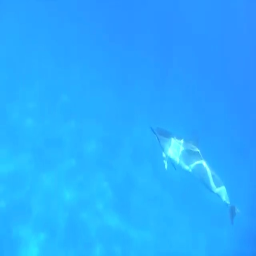

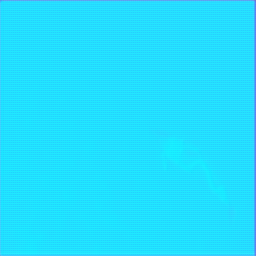

1/1 [==============================] - 5s 5s/step


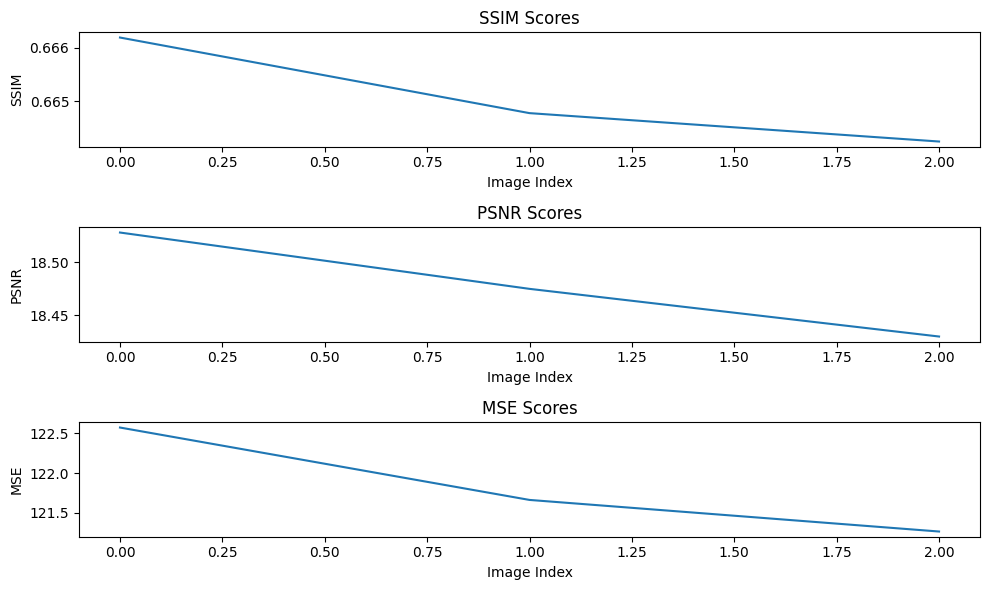

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from google.colab.patches import cv2_imshow

# Define U-Net model
def build_unet(input_shape):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Expansive Path
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output layer
    outputs = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load the image dataset
def load_dataset(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256)) / 255.0  # Normalize pixel values
        images.append(img)
    return np.array(images)

# Train the U-Net model
def train_model(model, images, epochs):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(images, images, epochs=epochs, batch_size=16, shuffle=True)
    return history

# Display original and enhanced images
def display_results(original_image, enhanced_image):
    original_image = cv2.convertScaleAbs(original_image, alpha=255.0)
    enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=255.0)
    cv2_imshow(cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))
    cv2_imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

# Compute metrics for all images in the dataset
def compute_metrics(original_images, enhanced_images):
    ssim_scores = []
    psnr_scores = []
    mse_scores = []

    for i in range(len(original_images)):
        original_image = cv2.cvtColor(np.uint8(original_images[i] * 255), cv2.COLOR_RGB2GRAY)
        enhanced_image = cv2.cvtColor(np.uint8(enhanced_images[i] * 255), cv2.COLOR_RGB2GRAY)

        ssim_score = ssim(original_image, enhanced_image)
        psnr_score = psnr(original_image, enhanced_image)
        mse_score = np.mean((original_image - enhanced_image) ** 2)

        ssim_scores.append(ssim_score)
        psnr_scores.append(psnr_score)
        mse_scores.append(mse_score)

    return ssim_scores, psnr_scores, mse_scores

# Plot SSIM, PSNR, and MSE scores
def plot_metrics(ssim_scores, psnr_scores, mse_scores):
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(ssim_scores)
    plt.title('SSIM Scores')
    plt.xlabel('Image Index')
    plt.ylabel('SSIM')

    plt.subplot(3, 1, 2)
    plt.plot(psnr_scores)
    plt.title('PSNR Scores')
    plt.xlabel('Image Index')
    plt.ylabel('PSNR')

    plt.subplot(3, 1, 3)
    plt.plot(mse_scores)
    plt.title('MSE Scores')
    plt.xlabel('Image Index')
    plt.ylabel('MSE')

    plt.tight_layout()
    plt.show()

# Load the dataset
image_paths = ["/content/Dolphin1/img/10.jpg", "/content/Dolphin1/img/11.jpg", "/content/Dolphin1/img/12.jpg"]
images = load_dataset(image_paths)

# Build and summarize the U-Net model
model = build_unet((256, 256, 3))
model.summary()

# Train the model
history = train_model(model, images, epochs=10)

# Display loss curves
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Display results for the first image
original_image = images[0]
enhanced_image = model.predict(np.expand_dims(original_image, axis=0))[0]
display_results(original_image, enhanced_image)

# Compute metrics for all images in the dataset
ssim_scores, psnr_scores, mse_scores = compute_metrics(images, model.predict(images))

# Plot SSIM, PSNR, and MSE scores
plot_metrics(ssim_scores, psnr_scores, mse_scores)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from google.colab.patches import cv2_imshow

# Define U-Net model
def build_unet(input_shape):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Expansive Path
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output layer
    outputs = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load the image dataset
def load_dataset(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256)) / 255.0  # Normalize pixel values
        images.append(img)
    return np.array(images)

# Train the U-Net model
def train_model(model, images, epochs):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(images, images, epochs=epochs, batch_size=16, shuffle=True)
    return history

# Display original and enhanced images
def display_results(original_image, enhanced_image):
    original_image = cv2.convertScaleAbs(original_image, alpha=255.0)
    enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=255.0)
    cv2_imshow(cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))
    cv2_imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR))

# Compute metrics for all images in the dataset
def compute_metrics(original_images, enhanced_images):
    ssim_scores = []
    psnr_scores = []
    mse_scores = []

    for i in range(len(original_images)):
        original_image = cv2.cvtColor(np.uint8(original_images[i] * 255), cv2.COLOR_RGB2GRAY)
        enhanced_image = cv2.cvtColor(np.uint8(enhanced_images[i] * 255), cv2.COLOR_RGB2GRAY)

        ssim_score = ssim(original_image, enhanced_image)
        psnr_score = psnr(original_image, enhanced_image)
        mse_score = np.mean((original_image - enhanced_image) ** 2)

        ssim_scores.append(ssim_score)
        psnr_scores.append(psnr_score)
        mse_scores.append(mse_score)

    return ssim_scores, psnr_scores, mse_scores

# Plot SSIM, PSNR, and MSE scores
def plot_metrics(ssim_scores, psnr_scores, mse_scores):
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(ssim_scores)
    plt.title('SSIM Scores')
    plt.xlabel('Image Index')
    plt.ylabel('SSIM')

    plt.subplot(3, 1, 2)
    plt.plot(psnr_scores)
    plt.title('PSNR Scores')
    plt.xlabel('Image Index')
    plt.ylabel('PSNR')

    plt.subplot(3, 1, 3)
    plt.plot(mse_scores)
    plt.title('MSE Scores')
    plt.xlabel('Image Index')
    plt.ylabel('MSE')

    plt.tight_layout()
    plt.show()

# Load the dataset
image_paths = ["/content/Dolphin1/img/10.jpg", "/content/Dolphin1/img/11.jpg", "/content/Dolphin1/img/12.jpg"]
images = load_dataset(image_paths)

# Build and summarize the U-Net model
model = build_unet((256, 256, 3))
model.summary()

# Train the model
history = train_model(model, images, epochs=10)

# Display loss curves
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Display results for the first image
original_image = images[0]
enhanced_image = model.predict(np.expand_dims(original_image, axis=0))[0]
display_results(original_image, enhanced_image)

# Compute metrics for all images in the dataset
ssim_scores, psnr_scores, mse_scores = compute_metrics(images, model.predict(images))

# Plot SSIM, PSNR, and MSE scores
plot_metrics(ssim_scores, psnr_scores, mse_scores)


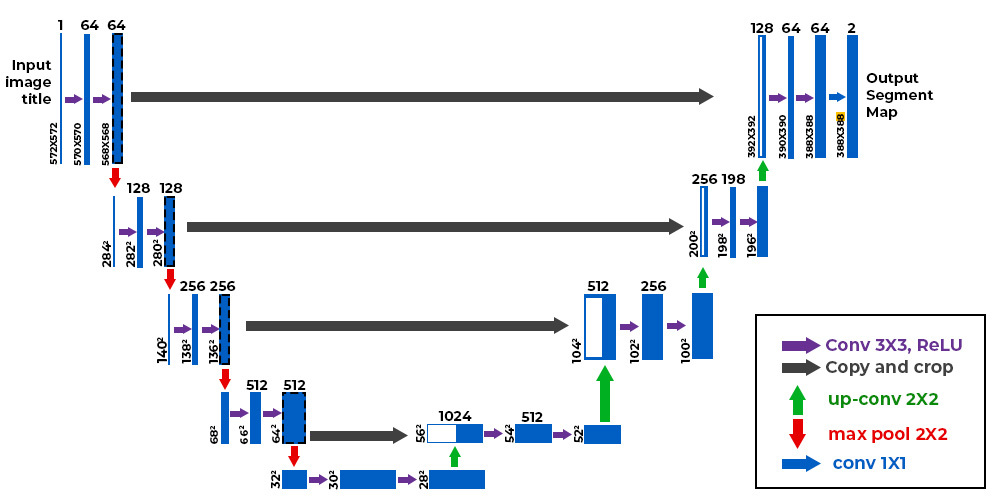

In [ ]:
import pathlib
data_dir='/content/drive/MyDrive/ColabNotebooks/PNEUMONIA DATASET/chest_xray/test'
data_dir = pathlib.Path(data_dir)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd drive/'My Drive/ColabNotebooks/PNEUMONIA DATASET'/

In [ ]:
from tqdm import tqdm
import numpy as np
import hashlib
import keras_cv
import PIL
import os

class_images_dir = "class-images"
os.makedirs(class_images_dir, exist_ok=True)

model = keras_cv.models.StableDiffusion(img_width=512, img_height=512, jit_compile=True)

class_prompt = "a photo of dog"
num_imgs_to_generate = 200
for i in tqdm(range(num_imgs_to_generate)):
    images = model.text_to_image(
        class_prompt,
        batch_size=3,
    )
    idx = np.random.choice(len(images))
    selected_image = PIL.Image.fromarray(images[idx])
    hash_image = hashlib.sha1(selected_image.tobytes()).hexdigest()
    image_filename = os.path.join(class_images_dir, f"{hash_image}.jpg")
    selected_image.save(image_filename)

In [ ]:
instance_images_root = tf.keras.utils.get_file(
    origin="https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/instance-images.tar.gz",
    untar=True,
)
class_images_root = tf.keras.utils.get_file(
    origin="https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/class-images.tar.gz",
    untar=True,
)

In [ ]:
instance_image_paths = list(paths.list_images(instance_images_root))
class_image_paths = list(paths.list_images(class_images_root)

In [ ]:
def load_images(image_paths):
    images = [np.array(keras.utils.load_img(path)) for path in image_paths]
    return images

In [ ]:
def plot_images(images, title=None):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        if title is not None:
            plt.title(title)
        plt.imshow(images[i])
        plt.axis("off")

In [ ]:
plot_images(load_images(instance_image_paths[:5]))

In [ ]:
plot_images(load_images(class_image_paths[:5]))

In [ ]:
# Since we're using prior preservation, we need to match the number
# of instance images we're using. We just repeat the instance image paths
# to do so.
new_instance_image_paths = []
for index in range(len(class_image_paths)):
    instance_image = instance_image_paths[index % len(instance_image_paths)]
    new_instance_image_paths.append(instance_image)

# We just repeat the prompts / captions per images.
unique_id = "sks"
class_label = "dog"

instance_prompt = f"a photo of {unique_id} {class_label}"
instance_prompts = [instance_prompt] * len(new_instance_image_paths)

class_prompt = f"a photo of {class_label}"
class_prompts = [class_prompt] * len(class_image_paths)

In [ ]:
import itertools

# The padding token and maximum prompt length are specific to the text encoder.
# If you're using a different text encoder be sure to change them accordingly.
padding_token = 49407
max_prompt_length = 77

# Load the tokenizer.
tokenizer = keras_cv.models.stable_diffusion.SimpleTokenizer()

# Method to tokenize and pad the tokens.
def process_text(caption):
    tokens = tokenizer.encode(caption)
    tokens = tokens + [padding_token] * (max_prompt_length - len(tokens))
    return np.array(tokens)


# Collate the tokenized captions into an array.
tokenized_texts = np.empty(
    (len(instance_prompts) + len(class_prompts), max_prompt_length)
)

for i, caption in enumerate(itertools.chain(instance_prompts, class_prompts)):
    tokenized_texts[i] = process_text(caption)


# We also pre-compute the text embeddings to save some memory during training.
POS_IDS = tf.convert_to_tensor([list(range(max_prompt_length))], dtype=tf.int32)
text_encoder = keras_cv.models.stable_diffusion.TextEncoder(max_prompt_length)

gpus = tf.config.list_logical_devices("GPU")

# Ensure the computation takes place on a GPU.
# Note that it's done automatically when there's a GPU present.
# This example just attempts at showing how you can do it
# more explicitly.
with tf.device(gpus[0].name):
    embedded_text = text_encoder(
        [tf.convert_to_tensor(tokenized_texts), POS_IDS], training=False
    ).numpy()

# To ensure text_encoder doesn't occupy any GPU space.
del text_encoder

In [ ]:
resolution = 512
auto = tf.data.AUTOTUNE

augmenter = keras.Sequential(
    layers=[
        keras_cv.layers.CenterCrop(resolution, resolution),
        keras_cv.layers.RandomFlip(),
        keras.layers.Rescaling(scale=1.0 / 127.5, offset=-1),
    ]
)


def process_image(image_path, tokenized_text):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_png(image, 3)
    image = tf.image.resize(image, (resolution, resolution))
    return image, tokenized_text


def apply_augmentation(image_batch, embedded_tokens):
    return augmenter(image_batch), embedded_tokens


def prepare_dict(instance_only=True):
    def fn(image_batch, embedded_tokens):
        if instance_only:
            batch_dict = {
                "instance_images": image_batch,
                "instance_embedded_texts": embedded_tokens,
            }
            return batch_dict
        else:
            batch_dict = {
                "class_images": image_batch,
                "class_embedded_texts": embedded_tokens,
            }
            return batch_dict

    return fn


def assemble_dataset(image_paths, embedded_texts, instance_only=True, batch_size=1):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, embedded_texts))
    dataset = dataset.map(process_image, num_parallel_calls=auto)
    dataset = dataset.shuffle(5, reshuffle_each_iteration=True)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(apply_augmentation, num_parallel_calls=auto)

    prepare_dict_fn = prepare_dict(instance_only=instance_only)
    dataset = dataset.map(prepare_dict_fn, num_parallel_calls=auto)
    return dataset

In [ ]:
instance_dataset = assemble_dataset(
    new_instance_image_paths,
    embedded_text[: len(new_instance_image_paths)],
)
class_dataset = assemble_dataset(
    class_image_paths,
    embedded_text[len(new_instance_image_paths) :],
    instance_only=False,
)
train_dataset = tf.data.Dataset.zip((instance_dataset, class_dataset))

In [ ]:
sample_batch = next(iter(train_dataset))
print(sample_batch[0].keys(), sample_batch[1].keys())

for k in sample_batch[0]:
    print(k, sample_batch[0][k].shape)

for k in sample_batch[1]:
    print(k, sample_batch[1][k].shape)

In [ ]:
import tensorflow.experimental.numpy as tnp


class DreamBoothTrainer(tf.keras.Model):
    # Reference:
    # https://github.com/huggingface/diffusers/blob/main/examples/dreambooth/train_dreambooth.py

    def __init__(
        self,
        diffusion_model,
        vae,
        noise_scheduler,
        use_mixed_precision=False,
        prior_loss_weight=1.0,
        max_grad_norm=1.0,
        **kwargs,
    ):
        super().__init__(**kwargs)

        self.diffusion_model = diffusion_model
        self.vae = vae
        self.noise_scheduler = noise_scheduler
        self.prior_loss_weight = prior_loss_weight
        self.max_grad_norm = max_grad_norm

        self.use_mixed_precision = use_mixed_precision
        self.vae.trainable = False

    def train_step(self, inputs):
        instance_batch = inputs[0]
        class_batch = inputs[1]

        instance_images = instance_batch["instance_images"]
        instance_embedded_text = instance_batch["instance_embedded_texts"]
        class_images = class_batch["class_images"]
        class_embedded_text = class_batch["class_embedded_texts"]

        images = tf.concat([instance_images, class_images], 0)
        embedded_texts = tf.concat([instance_embedded_text, class_embedded_text], 0)
        batch_size = tf.shape(images)[0]

        with tf.GradientTape() as tape:
            # Project image into the latent space and sample from it.
            latents = self.sample_from_encoder_outputs(self.vae(images, training=False))
            # Know more about the magic number here:
            # https://keras.io/examples/generative/fine_tune_via_textual_inversion/
            latents = latents * 0.18215

            # Sample noise that we'll add to the latents.
            noise = tf.random.normal(tf.shape(latents))

            # Sample a random timestep for each image.
            timesteps = tnp.random.randint(
                0, self.noise_scheduler.train_timesteps, (batch_size,)
            )

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process).
            noisy_latents = self.noise_scheduler.add_noise(
                tf.cast(latents, noise.dtype), noise, timesteps
            )

            # Get the target for loss depending on the prediction type
            # just the sampled noise for now.
            target = noise  # noise_schedule.predict_epsilon == True

            # Predict the noise residual and compute loss.
            timestep_embedding = tf.map_fn(
                lambda t: self.get_timestep_embedding(t), timesteps, dtype=tf.float32
            )
            model_pred = self.diffusion_model(
                [noisy_latents, timestep_embedding, embedded_texts], training=True
            )
            loss = self.compute_loss(target, model_pred)
            if self.use_mixed_precision:
                loss = self.optimizer.get_scaled_loss(loss)

        # Update parameters of the diffusion model.
        trainable_vars = self.diffusion_model.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        if self.use_mixed_precision:
            gradients = self.optimizer.get_unscaled_gradients(gradients)
        gradients = [tf.clip_by_norm(g, self.max_grad_norm) for g in gradients]
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        return {m.name: m.result() for m in self.metrics}

    def get_timestep_embedding(self, timestep, dim=320, max_period=10000):
        half = dim // 2
        log_max_period = tf.math.log(tf.cast(max_period, tf.float32))
        freqs = tf.math.exp(
            -log_max_period * tf.range(0, half, dtype=tf.float32) / half
        )
        args = tf.convert_to_tensor([timestep], dtype=tf.float32) * freqs
        embedding = tf.concat([tf.math.cos(args), tf.math.sin(args)], 0)
        return embedding

    def sample_from_encoder_outputs(self, outputs):
        mean, logvar = tf.split(outputs, 2, axis=-1)
        logvar = tf.clip_by_value(logvar, -30.0, 20.0)
        std = tf.exp(0.5 * logvar)
        sample = tf.random.normal(tf.shape(mean), dtype=mean.dtype)
        return mean + std * sample

    def compute_loss(self, target, model_pred):
        # Chunk the noise and model_pred into two parts and compute the loss
        # on each part separately.
        # Since the first half of the inputs has instance samples and the second half
        # has class samples, we do the chunking accordingly.
        model_pred, model_pred_prior = tf.split(
            model_pred, num_or_size_splits=2, axis=0
        )
        target, target_prior = tf.split(target, num_or_size_splits=2, axis=0)

        # Compute instance loss.
        loss = self.compiled_loss(target, model_pred)

        # Compute prior loss.
        prior_loss = self.compiled_loss(target_prior, model_pred_prior)

        # Add the prior loss to the instance loss.
        loss = loss + self.prior_loss_weight * prior_loss
        return loss

    def save_weights(self, filepath, overwrite=True, save_format=None, options=None):
        # Overriding this method will allow us to use the `ModelCheckpoint`
        # callback directly with this trainer class. In this case, it will
        # only checkpoint the `diffusion_model` since that's what we're training
        # during fine-tuning.
        self.diffusion_model.save_weights(
            filepath=filepath,
            overwrite=overwrite,
            save_format=save_format,
            options=options,
        )

    def load_weights(self, filepath, by_name=False, skip_mismatch=False, options=None):
        # Similarly override `load_weights()` so that we can directly call it on
        # the trainer class object.
        self.diffusion_model.load_weights(
            filepath=filepath,
            by_name=by_name,
            skip_mismatch=skip_mismatch,
            options=options,
        )

In [ ]:
# Comment it if you are not using a GPU having tensor cores.
tf.keras.mixed_precision.set_global_policy("mixed_float16")

use_mp = True  # Set it to False if you're not using a GPU with tensor cores.

image_encoder = keras_cv.models.stable_diffusion.ImageEncoder()
dreambooth_trainer = DreamBoothTrainer(
    diffusion_model=keras_cv.models.stable_diffusion.DiffusionModel(
        resolution, resolution, max_prompt_length
    ),
    # Remove the top layer from the encoder, which cuts off the variance and only
    # returns the mean.
    vae=tf.keras.Model(
        image_encoder.input,
        image_encoder.layers[-2].output,
    ),
    noise_scheduler=keras_cv.models.stable_diffusion.NoiseScheduler(),
    use_mixed_precision=use_mp,
)

# These hyperparameters come from this tutorial by Hugging Face:
# https://github.com/huggingface/diffusers/tree/main/examples/dreambooth
learning_rate = 5e-6
beta_1, beta_2 = 0.9, 0.999
weight_decay = (1e-2,)
epsilon = 1e-08

optimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    beta_1=beta_1,
    beta_2=beta_2,
    epsilon=epsilon,
)
dreambooth_trainer.compile(optimizer=optimizer, loss="mse")

In [ ]:
num_update_steps_per_epoch = train_dataset.cardinality()
max_train_steps = 800
epochs = math.ceil(max_train_steps / num_update_steps_per_epoch)
print(f"Training for {epochs} epochs.")

In [ ]:
ckpt_path = "dreambooth-unet.h5"
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    save_weights_only=True,
    monitor="loss",
    mode="min",
)
dreambooth_trainer.fit(train_dataset, epochs=epochs, callbacks=[ckpt_callback])

In [ ]:
# Initialize a new Stable Diffusion model.
dreambooth_model = keras_cv.models.StableDiffusion(
    img_width=resolution, img_height=resolution, jit_compile=True
)
dreambooth_model.diffusion_model.load_weights(ckpt_path)

# Note how the unique identifier and the class have been used in the prompt.
prompt = f"A photo of {unique_id} {class_label} in a bucket"
num_imgs_to_gen = 3

images_dreamboothed = dreambooth_model.text_to_image(prompt, batch_size=num_imgs_to_gen)
plot_images(images_dreamboothed, prompt)

In [ ]:
unet_weights = tf.keras.utils.get_file(
    origin="https://huggingface.co/chansung/dreambooth-dog/resolve/main/lr%409e-06-max_train_steps%40200-train_text_encoder%40True-unet.h5"
)
text_encoder_weights = tf.keras.utils.get_file(
    origin="https://huggingface.co/chansung/dreambooth-dog/resolve/main/lr%409e-06-max_train_steps%40200-train_text_encoder%40True-text_encoder.h5"
)

dreambooth_model.diffusion_model.load_weights(unet_weights)
dreambooth_model.text_encoder.load_weights(text_encoder_weights)

images_dreamboothed = dreambooth_model.text_to_image(prompt, batch_size=num_imgs_to_gen)
plot_images(images_dreamboothed, prompt)

In [ ]:
images_dreamboothed = dreambooth_model.text_to_image(
    prompt, batch_size=num_imgs_to_gen, num_steps=100
)
plot_images(images_dreamboothed, prompt)